In [1]:
from keras.models import load_model
import numpy as np
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [52]:
classifier = load_model('/mnt/disks/gscratch/models/my_model4_epoch3.h5')

In [3]:
x_test = np.load('/mnt/disks/gscratch/val_/test_img_pixnum2000_0.npy')
y_test = np.load('/mnt/disks/gscratch/val_/test_label_pixnum2000_0.npy')

In [18]:
kek = np.argmax(y_hat, axis=3)

In [20]:
lel = np.reshape(kek, (-1))

In [53]:
y_hat = classifier.predict(x_test)

In [46]:
y_kek = np.argmax(y_hat, axis=1)

In [54]:
y_topkek = np.reshape(np.argmax(y_hat, axis=3), (-1))

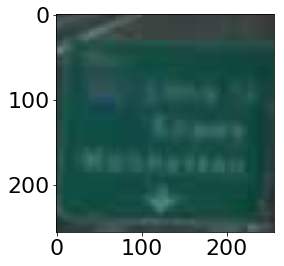

In [42]:
plt.imshow(x_test[220])

In [10]:
acc = np.mean(np.equal(np.argmax(y_hat, axis=3), y_test))

In [12]:
#this function creates a confusion matrix that looks pretty
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues): #### You can change the colorMap Here!!!
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.rcParams.update({'font.size':12})
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.rcParams.update({'font.size':22})
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

/home/dcashon/neural_nets/lib/python3.5/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Normalized confusion matrix
[[0.00e+00 1.43e-01 1.43e-01 0.00e+00 0.00e+00 0.00e+00 1.90e-01 3.81e-01
  0.00e+00 1.43e-01]
 [0.00e+00 7.03e-01 1.24e-01 0.00e+00 0.00e+00 0.00e+00 2.76e-02 7.59e-02
  0.00e+00 6.90e-02]
 [1.37e-04 6.33e-02 8.34e-01 4.11e-04 0.00e+00 2.19e-03 2.40e-02 4.48e-02
  1.37e-04 3.10e-02]
 [0.00e+00 1.33e-01 4.33e-01 3.33e-02 0.00e+00 3.33e-02 1.00e-01 1.00e-01
  0.00e+00 1.67e-01]
 [0.00e+00 1.44e-01 2.14e-01 0.00e+00 9.85e-02 1.93e-02 2.58e-01 1.93e-01
  0.00e+00 7.37e-02]
 [0.00e+00 1.67e-01 3.33e-01 0.00e+00 0.00e+00 0.00e+00 3.33e-01 1.67e-01
  0.00e+00 0.00e+00]
 [0.00e+00 5.35e-02 4.72e-02 0.00e+00 3.14e-03 0.00e+00 7.58e-01 1.01e-01
  0.00e+00 3.77e-02]
 [0.00e+00 8.07e-02 6.52e-02 0.00e+00 1.20e-03 0.00e+00 1.81e-01 6.44e-01
  0.00e+00 2.87e-02]
 [     nan      nan      nan      nan      nan      nan      nan      nan
       nan      nan]
 [0.00e+00 3.18e-01 2.38e-01 0.00e+00 0.00e+00 0.00e+00 3.64e-02 1.21e-01
  0.00e+00 2.86e-01]]


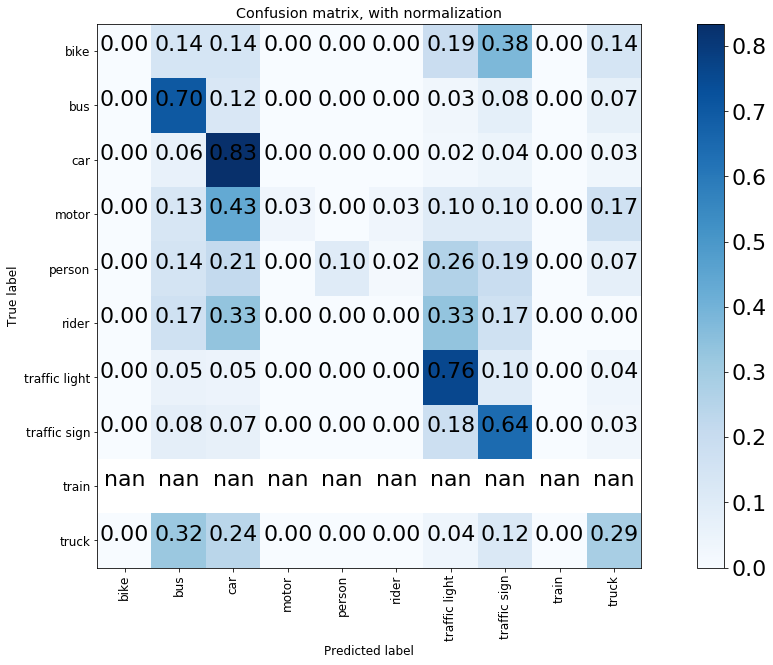

In [51]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_kek);
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(20,10))
classes = ['bike', 'bus', 'car', 'motor', 'person', 'rider', 'traffic light', 'traffic sign', 'train', 'truck']

plot_confusion_matrix(cnf_matrix, classes=classes,
                      title='Confusion matrix, with normalization', normalize=True)
plt.show()

/home/dcashon/neural_nets/lib/python3.5/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Normalized confusion matrix
[[0.00e+00 1.43e-01 1.43e-01 0.00e+00 0.00e+00 0.00e+00 1.90e-01 3.81e-01
  0.00e+00 1.43e-01]
 [0.00e+00 7.03e-01 1.24e-01 0.00e+00 0.00e+00 0.00e+00 2.76e-02 7.59e-02
  0.00e+00 6.90e-02]
 [1.37e-04 6.33e-02 8.34e-01 4.11e-04 0.00e+00 2.19e-03 2.40e-02 4.48e-02
  1.37e-04 3.10e-02]
 [0.00e+00 1.33e-01 4.33e-01 3.33e-02 0.00e+00 3.33e-02 1.00e-01 1.00e-01
  0.00e+00 1.67e-01]
 [0.00e+00 1.44e-01 2.14e-01 0.00e+00 9.85e-02 1.93e-02 2.58e-01 1.93e-01
  0.00e+00 7.37e-02]
 [0.00e+00 1.67e-01 3.33e-01 0.00e+00 0.00e+00 0.00e+00 3.33e-01 1.67e-01
  0.00e+00 0.00e+00]
 [0.00e+00 5.35e-02 4.72e-02 0.00e+00 3.14e-03 0.00e+00 7.58e-01 1.01e-01
  0.00e+00 3.77e-02]
 [0.00e+00 8.07e-02 6.52e-02 0.00e+00 1.20e-03 0.00e+00 1.81e-01 6.44e-01
  0.00e+00 2.87e-02]
 [     nan      nan      nan      nan      nan      nan      nan      nan
       nan      nan]
 [0.00e+00 3.18e-01 2.38e-01 0.00e+00 0.00e+00 0.00e+00 3.64e-02 1.21e-01
  0.00e+00 2.86e-01]]


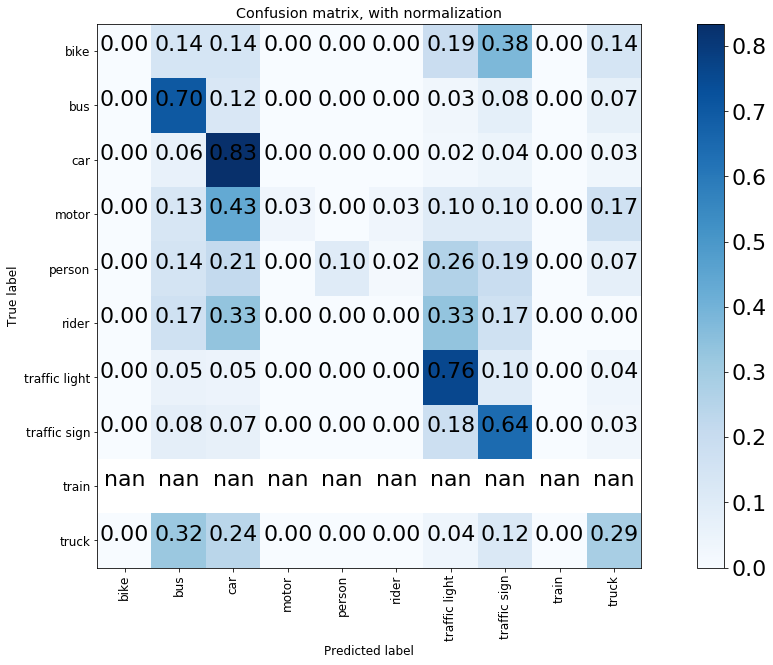

In [31]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, np.argmax(y_hat, axis=1));
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(20,10))
classes = ['bike', 'bus', 'car', 'motor', 'person', 'rider', 'traffic light', 'traffic sign', 'train', 'truck']

plot_confusion_matrix(cnf_matrix, classes=classes,
                      title='Confusion matrix, with normalization', normalize=True)
plt.show()